<a href="https://colab.research.google.com/github/romeroandion/analises_estatisticas_python/blob/main/Analise_PNAD_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
dados = pd.read_csv('dados.csv')

### Conteúdo do DataFrame

In [ ]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliação do comportamento da variável RENDA será contruída uma tabela de frequências considerando as seguintes classes em salários mínimos (SM):

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

O salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

In [ ]:
dados.Renda.min()

0

In [ ]:
dados.Renda.max()

200000

In [ ]:
classes = [0, 1576, 3940, 11820, 19700, 200000]

In [ ]:
labels = ['E', 'D', 'C', 'B', 'A']

In [ ]:
frequencia = pd.value_counts(pd.cut (x = dados.Renda, bins = classes, 
                                     labels = labels, include_lowest = True))
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

In [ ]:
percentual = pd.value_counts(pd.cut(x = dados.Renda, bins = classes, 
                                    labels = labels, include_lowest = True), 
                                    normalize = True)* 100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### DataFrame: frequência e porcentagem de renda da população

In [ ]:
df_renda = pd.DataFrame({'Frequência':frequencia, 'Porcentagem(%)':percentual})
df_renda.sort_index(ascending = False, inplace = True)
df_renda

,Frequência,Porcentagem(%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


### Gráfico de barras: frequência de renda da população

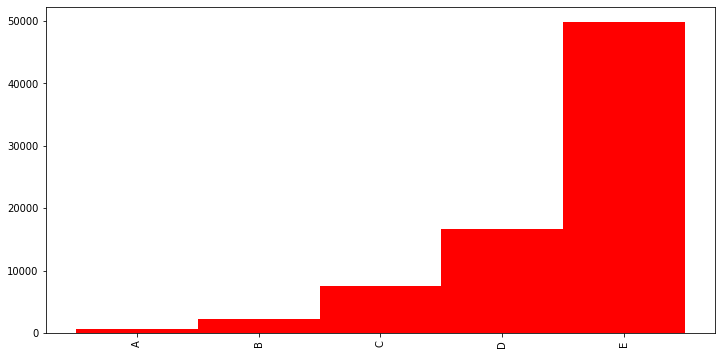

In [ ]:
df_renda['Frequência'].plot.bar(width = 1, color = 'red', figsize = (12,6))

> ### Conclusões

Pode-se observar que, na população estudada e de acordo com o período da pesquisa, que há um predomínio de pessoas com baixa renda (classe E - renda mensal de até 2 salários mínimos).

### Histrogramas para variáveis quantitativas do dataset

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


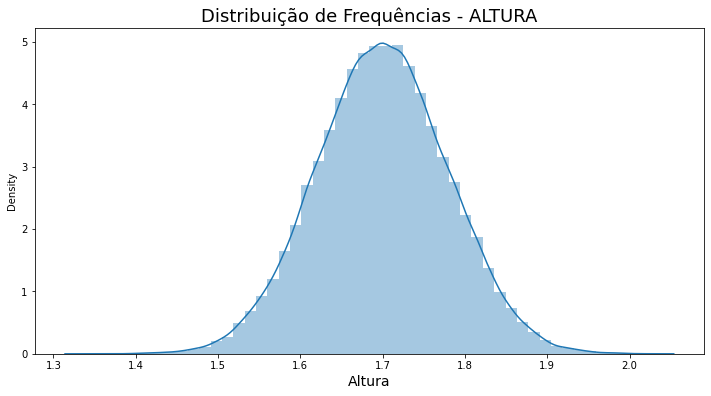

In [ ]:
aalt = sns.distplot (dados.Altura)
aalt.figure.set_size_inches(12,6)
aalt.set_title('Distribuição de Frequências - ALTURA', fontsize=18)
aalt.set_xlabel('Altura', fontsize=14)
aidade.set_ylabel('População', fontsize=12)
ax

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(20.200000000000003, 0.5, 'População')

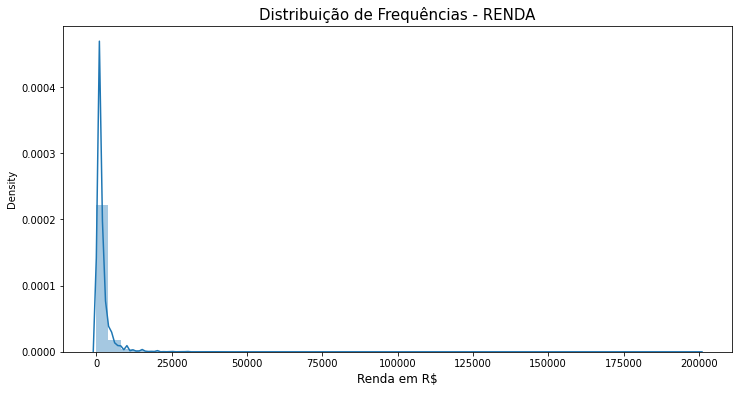

In [ ]:
arenda = sns.distplot(dados.Renda)
arenda.figure.set_size_inches(12,6)
arenda.set_title('Distribuição de Frequências - RENDA', fontsize=15)
arenda.set_xlabel('Renda em R$', fontsize=12)
aidade.set_ylabel('População', fontsize=12)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'População')

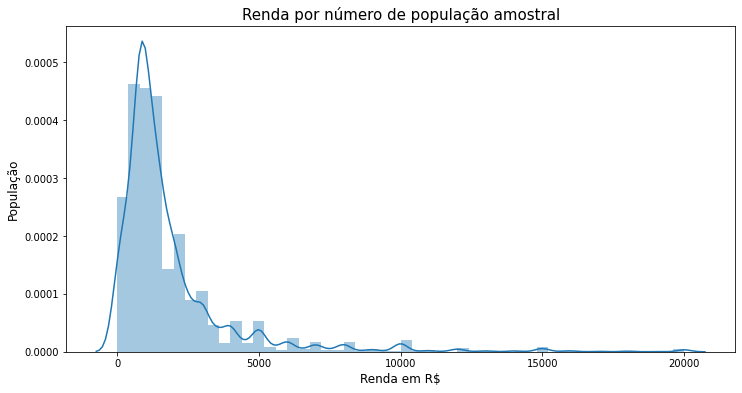

In [ ]:
arendaa = sns.distplot(dados.query('Renda <= 20000').Renda)
arendaa.figure.set_size_inches(12,6)
arendaa.set_title('Renda por número de população amostral', fontsize=15)
arendaa.set_xlabel('Renda em R$', fontsize=12)
arendaa.set_ylabel('População', fontsize=12)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(20.200000000000003, 0.5, 'População')

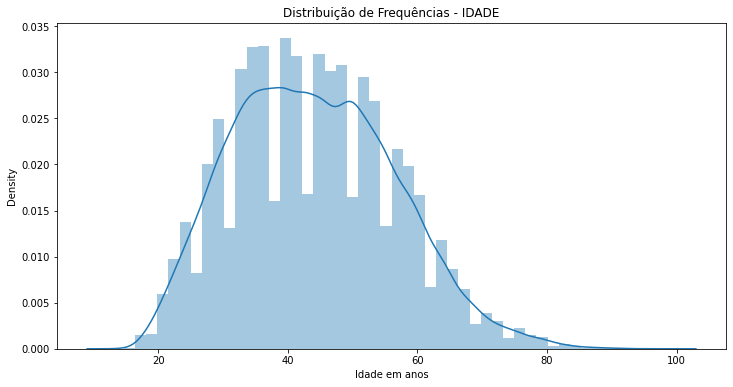

In [ ]:
aid = sns.distplot(dados.Idade)
aid.figure.set_size_inches(12,6)
aid.set_title('Distribuição de Frequências - IDADE')
aid.set_xlabel('Idade em anos')
aidade.set_ylabel('População', fontsize=12)

> ### Conclusões

Pode-se observar que, na população estudada e de acordo com o período da pesquisa:

1) a variável 'Altura' apresenta-se simétrica em seu histograma, havendo pouca dispersão de dados.

2) a variável 'Renda' apresenta-se com assimetria à direita em seu histograma, mostrando que há uma parcela pequena da população do estudo que possui uma renda maior.

3) a variável 'Idade' apresenta-se com diferentes picos em seu histograma, provavelmente pela alta variação de idades da população analisada.

### Tabela de frequências e percentuais cruzando as variáveis SEXO e COR

In [ ]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [ ]:
frequenciaa = pd.crosstab(dados.Sexo, dados.Cor)
frequenciaa.rename(index = sexo, inplace = True)
frequenciaa.rename(columns = cor, inplace = True)
frequenciaa

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [ ]:
percentuaal = pd.crosstab(dados.Sexo, dados.Cor, normalize = True)* 100
percentuaal.rename (index = sexo, inplace = True)
percentuaal.rename(columns = cor, inplace = True)
percentuaal

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Observa-se que há um maior número de homens e mulheres pardas, em comparação com o restante da população estudada.

### Valores de média (mean), mediana (median) e valor máximo (max) da variável RENDA segundo SEXO e COR

In [ ]:
crenda = pd.crosstab(dados.Cor, dados.Sexo, 
                     aggfunc = {'mean', 'median', 'max'},
                     values = dados.Renda)
crenda.rename(index = cor, inplace = True)
crenda.rename(columns = sexo, inplace = True)
crenda

max                   mean                 median         
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                      
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

Observa-se que:

1) a renda máxima se mostrou maior para homens brancos, enquanto a menor renda máxima ocorreu na população feminina de cor amarela.

2) a média se mostrou maior para homens de cor amarela, enquanto a menor média salarial ocorreu na população masculina indígena.

3) a mediana se mostrou maior para homens de cor amarela, enquanto a menor mediana ocorreu na população feminina indígena.

### Medidas de dispersão: desvio máximo absoluto (mad), variância (var) e desvio padrão (std) da variável RENDA segundo SEXO e COR

In [ ]:
drenda = pd.crosstab(dados.Cor, dados.Sexo, aggfunc = {'mad', 'var', 'std'},
                     values = dados.Renda)
drenda.rename(index = cor, inplace = True)
drenda.rename(columns = sexo, inplace = True)
drenda

mad                       std                         var  \
Sexo        Masculino     Feminino    Masculino      Feminino     Masculino   
Cor                                                                           
Indígena   798.910889  3007.892952  1204.093490  11957.498292  1.449841e+06   
Branca    2261.012346  1670.967106  4750.791872   3251.013154  2.257002e+07   
Preta      975.602482   705.453357  1936.309271   1349.799809  3.749294e+06   
Amarela   3709.597211  2549.146322  5740.824820   3731.173660  3.295707e+07   
Parda     1125.827704   811.580946  2312.087184   1596.233048  5.345747e+06   

                        
Sexo          Feminino  
Cor                     
Indígena  1.429818e+08  
Branca    1.056909e+07  
Preta     1.821960e+06  
Amarela   1.392166e+07  
Parda     2.547960e+06

> ### Conclusões

Observa-se que há uma maior dispersão de dados quando observa-se a renda de homens brancos e de cor amarela, assim como de mulheres de cor amarela e indígenas.

### Box plot da variável RENDA segundo SEXO e COR

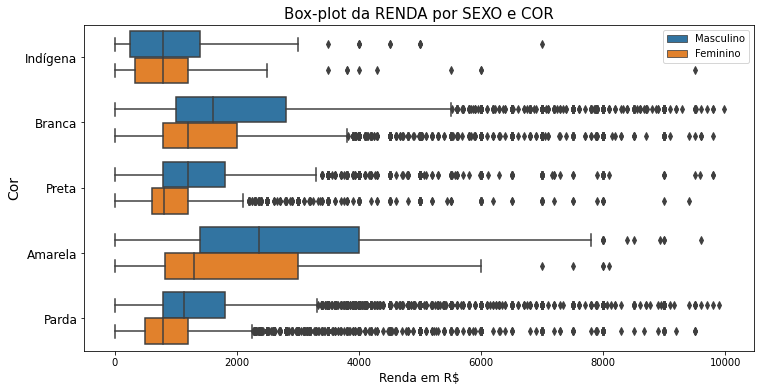

In [ ]:
rx = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', 
                 data=dados.query('Renda < 10000'), orient='h')
rx.figure.set_size_inches(12, 6)
rx.set_title('Box-plot da RENDA por SEXO e COR', fontsize=15) 
rx.set_xlabel('Renda em R$', fontsize=12)
rx.set_ylabel('Cor', fontsize=14)
rx.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela',
                    'Parda', 'Sem declaração'], fontsize=12)    
handles, _ = rx.get_legend_handles_labels()
rx.legend(handles, ['Masculino', 'Feminino'], fontsize=10)

rx

> ### Conclusões

Aqui, reitera-se as conclusões já realizadas nos tópicos acima no que diz respeito à Renda de acordo com Sexo e Cor.

Percentual de pessoas do <i>dataset</i> que ganham um salário mínimo (R$ 788,00) ou menos


In [ ]:
from scipy import stats

percentual = stats.percentileofscore(dados.Renda, 788, kind = 'weak')
print("{0:.2f}%".format(percentual))


28.87%


### Valor máximo ganho por 99% das pessoas do <i>dataset</i>

In [ ]:
valor = dados.Renda.quantile(.99)
print("R$ {0:.2f}".format(valor))

R$ 15000.00


### Média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO

In [ ]:
mrenda = pd.crosstab (dados['Anos de Estudo'], dados.Sexo, 
                      aggfunc = {'mean', 'median', 'max', 'std'},
                      values = dados.Renda)
mrenda.rename(index = anos_de_estudo, inplace = True)
mrenda.rename(columns = sexo, inplace = True)
mrenda

max                   mean               \
Sexo                           Masculino  Feminino    Masculino     Feminino   
Anos de Estudo                                                                 
Sem instrução e menos de 1 ano   30000.0   10000.0   799.494638   516.201748   
1 ano                            30000.0    2000.0   895.629047   492.771987   
2 anos                           40000.0    4000.0   931.178986   529.911638   
3 anos                           80000.0    3500.0  1109.203862   546.853916   
4 anos                           50000.0   10000.0  1302.329283   704.279111   
5 anos                           35000.0    8000.0  1338.653218   781.389776   
6 anos                           25000.0    6000.0  1448.875419   833.732824   
7 anos                           40000.0    9000.0  1465.497940   830.751004   
8 anos                           30000.0   18000.0  1639.396667   933.615351   
9 anos                           60000.0   20000.0  1508.038850   868.021700   
10 anos                          45000.0    6000.0  1731.270847   925.919225   
11 anos                         200000.0  100000.0  2117.060504  1286.790889   
12 anos                          30000.0  120000.0  2470.330776  1682.313725   
13 anos                          25000.0   20000.0  3195.099154  1911.730047   
14 anos                          50000.0   20000.0  3706.620269  2226.460457   
15 anos ou mais                 200000.0  100000.0  6134.279790  3899.513231   
Não determinados                  7000.0    3000.0  1295.761905   798.174419   

                                  median                   std               
Sexo                           Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano     700.0    390.0  1023.904884   639.311534  
1 ano                              788.0    400.0  1331.950552   425.291842  
2 anos                             788.0    450.0  1435.173827   498.234168  
3 anos                             800.0    500.0  2143.800133   424.124446  
4 anos                            1000.0    788.0  1419.821787   629.553397  
5 anos                            1045.0    788.0  1484.650587   635.782641  
6 anos                            1200.0    788.0  1476.628602   574.547028  
7 anos                            1200.0    788.0  1419.708673   602.038029  
8 anos                            1300.0    800.0  1515.583715   896.781213  
9 anos                            1200.0    788.0  2137.664774   973.221652  
10 anos                           1218.0    800.0  2078.609734   620.611907  
11 anos                           1500.0   1000.0  2676.538942  1819.040417  
12 anos                           1800.0   1200.0  2268.081538  4851.833513  
13 anos                           2400.0   1300.0  2797.116800  2053.789771  
14 anos                           2500.0   1600.0  3987.214974  2064.083336  
15 anos ou mais                   4000.0   2800.0  7447.613594  4212.770709  
Não determinados                  1200.0    788.0   979.648745   459.985964

### Box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO

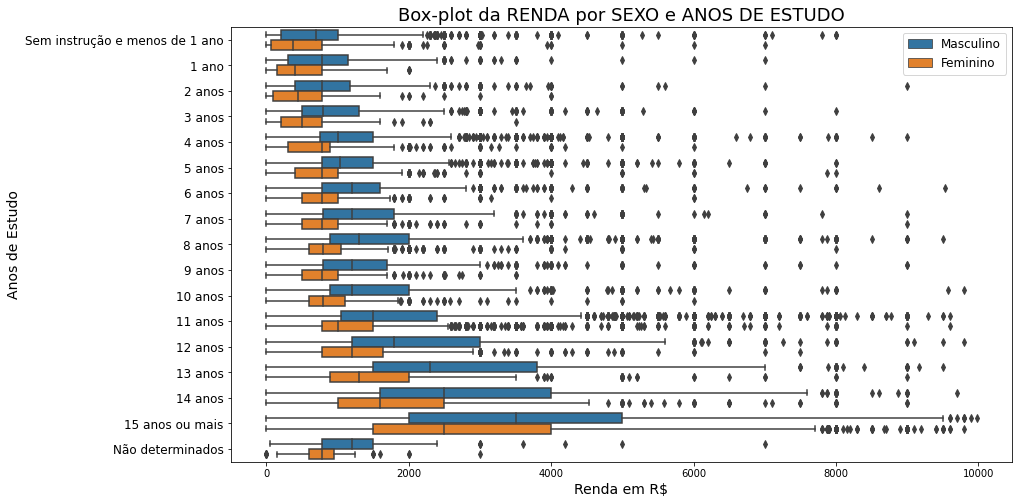

In [ ]:
ras = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', 
                  hue = 'Sexo', data = dados.query('Renda < 10000'), 
                  orient = 'h')
ras.figure.set_size_inches (14,8)
ras.set_title('Box-plot da RENDA por SEXO e ANOS DE ESTUDO', fontsize=18)
ras.set_xlabel('Renda em R$', fontsize=14)
ras.set_ylabel('Anos de Estudo', fontsize=14)
ras.set_yticklabels ([i for i in anos_de_estudo.values()], fontsize = 12)
handles, _ = ras.get_legend_handles_labels()
ras.legend(handles, ['Masculino', 'Feminino'], fontsize=12)
ras

> ### Conclusões

Através da tabela e boxsplot, pode-se obervar que há um aumento com relação à renda mensal de acordo com anos de estudo. Além disso, pode-se observar uma maior dispersão de dados ao se analisar indivíduos com 15 anos de estudos ou mais, pois é um dado menos específico.

Também é verificada uma diferença entre a renda de homens e mulheres, demonstrando certo grau de desigualdade relacionada ao sexo na população do estudo.

### Média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO

In [ ]:
mruf = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
mruf.rename(index = uf, inplace = True)
mruf

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO


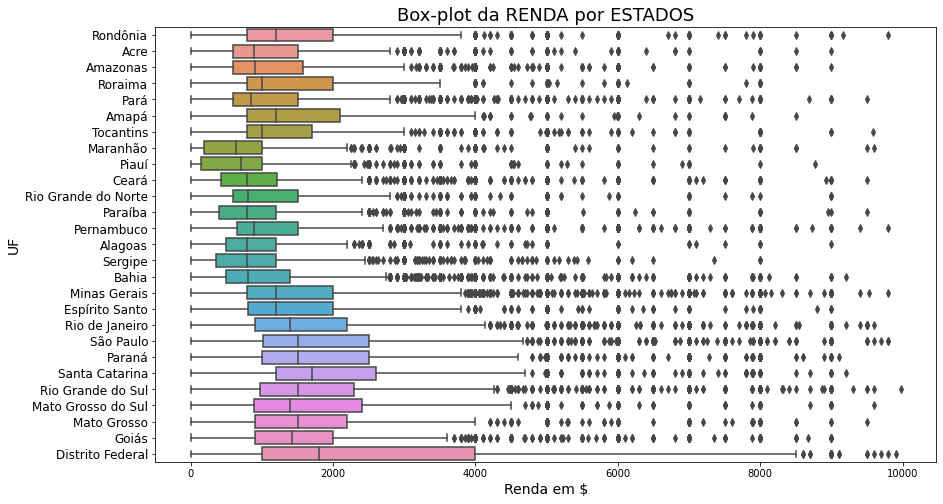

In [ ]:
aruf = sns.boxplot(x = 'Renda', y = 'UF', 
                   data = dados.query('Renda < 10000'), orient = 'h')
aruf.figure.set_size_inches(14,8)
aruf.set_title('Box-plot da RENDA por ESTADOS', fontsize=18)
aruf.set_xlabel ('Renda em $', fontsize=14)
aruf.set_ylabel ('UF', fontsize=14)
aruf.set_yticklabels([i for i in uf.values()], fontsize = 12)
aruf


> ### Conclusões

Observa-se uma maior concentração de renda nas regiões sudeste, sul, e parte do centro-oeste.